In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Intro to Machine Learning

One of the main ideas of machine learning, is to split data into testing and training sets.  These sets are used to develop the model, and subsequently test its accuracy.  Later, we will repeat this process a number of times to get an even better model.  Machine learning can be thought of as representing a philosophy to model building, where we improve our models by iteratively building the model and testing it's performance on held out data.

In [2]:
x = np.random.randn(400)
y = np.random.randn(400)

In [3]:
x.shape

(400,)

Text(0,1,'Idea of Test and Train Split \nin Machine Learning')

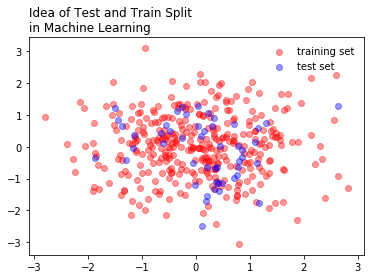

In [4]:
plt.scatter(x[:350], y[:350], color = 'red', alpha = 0.4, label = 'training set')
plt.scatter(x[350:], y[350:], color = 'blue', alpha = 0.4, label = 'test set')
plt.legend(loc = 'best', frameon = False)
plt.title("Idea of Test and Train Split \nin Machine Learning", loc = 'left')

In [5]:
X_train, x_test, y_train, y_test = x[:350].reshape(-1,1), x[350:].reshape(-1,1), y[:350].reshape(-1,1), y[350:].reshape(-1,1)

In [6]:
X_train.shape

(350, 1)

In [7]:
from sklearn import linear_model

In [8]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
reg.coef_

array([[-0.0010095]])

In [10]:
y_predict = reg.predict(x_test.reshape(-1,1))

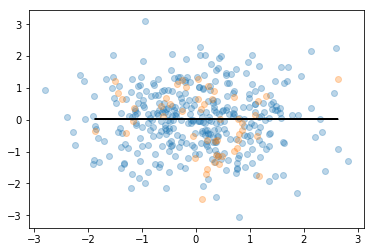

In [11]:
plt.scatter(X_train, y_train, alpha = 0.3)
plt.scatter(x_test, y_test, alpha = 0.3)
plt.plot(x_test, y_predict, color = 'black')

### Regression Example: Loading and Structuring Data

Predicting level of diabetes based on body mass index measures.

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
diabetes = datasets.load_diabetes()

In [18]:
diabetes

{'DESCR': 'Diabetes dataset\n================\n\nNotes\n-----\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\nData Set Characteristics:\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attributes:\n    :Age:\n    :Sex:\n    :Body mass index:\n    :Average blood pressure:\n    :S1:\n    :S2:\n    :S3:\n    :S4:\n    :S5:\n    :S6:\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttp://www4.stat.ncsu.edu/~boos/var.select/diabetes.html\n\nFor more information see:\nB

In [19]:
diabetes.DESCR

'Diabetes dataset\n================\n\nNotes\n-----\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\nData Set Characteristics:\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attributes:\n    :Age:\n    :Sex:\n    :Body mass index:\n    :Average blood pressure:\n    :S1:\n    :S2:\n    :S3:\n    :S4:\n    :S5:\n    :S6:\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttp://www4.stat.ncsu.edu/~boos/var.select/diabetes.html\n\nFor more information see:\nBradley Efr

In [20]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ..., 
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [34]:
diabetes.feature_names[2]

'bmi'

In [21]:
diabetes.data[:, np.newaxis, 2]

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [22]:
diabetes_X = diabetes.data[:, np.newaxis, 2]

In [23]:
diabetes.target

array([ 151.,   75.,  141.,  206.,  135.,   97.,  138.,   63.,  110.,
        310.,  101.,   69.,  179.,  185.,  118.,  171.,  166.,  144.,
         97.,  168.,   68.,   49.,   68.,  245.,  184.,  202.,  137.,
         85.,  131.,  283.,  129.,   59.,  341.,   87.,   65.,  102.,
        265.,  276.,  252.,   90.,  100.,   55.,   61.,   92.,  259.,
         53.,  190.,  142.,   75.,  142.,  155.,  225.,   59.,  104.,
        182.,  128.,   52.,   37.,  170.,  170.,   61.,  144.,   52.,
        128.,   71.,  163.,  150.,   97.,  160.,  178.,   48.,  270.,
        202.,  111.,   85.,   42.,  170.,  200.,  252.,  113.,  143.,
         51.,   52.,  210.,   65.,  141.,   55.,  134.,   42.,  111.,
         98.,  164.,   48.,   96.,   90.,  162.,  150.,  279.,   92.,
         83.,  128.,  102.,  302.,  198.,   95.,   53.,  134.,  144.,
        232.,   81.,  104.,   59.,  246.,  297.,  258.,  229.,  275.,
        281.,  179.,  200.,  200.,  173.,  180.,   84.,  121.,  161.,
         99.,  109.,

In [24]:
diabetes_y = diabetes.target

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, x_test = train_test_split(diabetes_X)
y_train, y_test = train_test_split(diabetes_y)

Text(0,1,'Example Test Train Split from Diabetes Data')

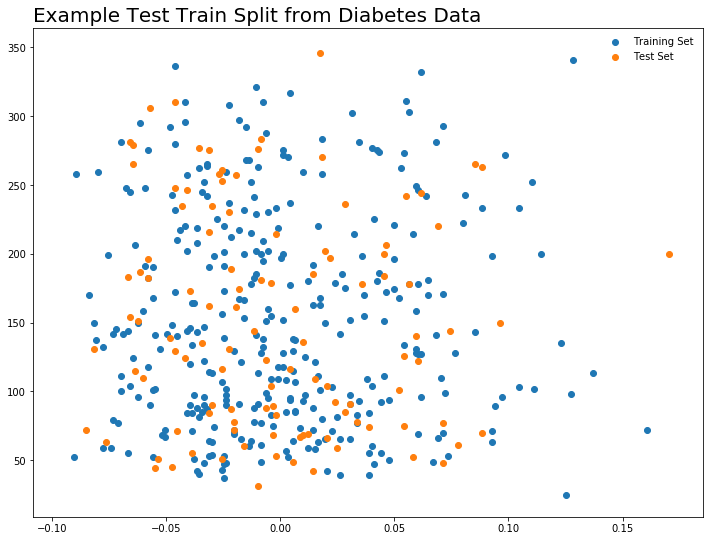

In [32]:
plt.figure(figsize = (12, 9))
plt.scatter(X_train, y_train, label = 'Training Set')
plt.scatter(x_test, y_test, label = 'Test Set')
plt.legend(frameon = False)
plt.title("Example Test Train Split from Diabetes Data", loc = 'left', size = 20)

### Linear Regression: Fitting and Evaluating the Model

In [35]:
regr = linear_model.LinearRegression()

In [36]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
predictions = regr.predict(x_test)

In [40]:
print("The coefficients of the model are: \n", regr.coef_)

The coefficients of the model are: 
 [ 6.29641819]


In [41]:
print("The intercept of the model are: \n", regr.intercept_)

The intercept of the model are: 
 152.512205614


In [43]:
print("The Equation for the Line of Best Fit is \n y = ", regr.coef_, 'x +', regr.intercept_)

The Equation for the Line of Best Fit is 
 y =  [ 6.29641819] x + 152.512205614


In [44]:
def l(x):
    return regr.coef_*x + regr.intercept_

In [45]:
l(30)

array([ 341.40475121])

In [46]:
x = np.linspace(min(X_train), max(X_train), 1000)

Text(0,1,'Example Test Train Split from Diabetes Data')

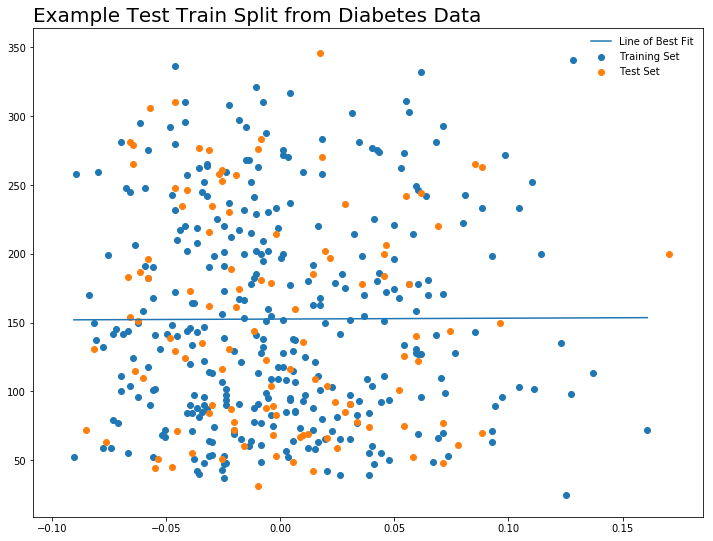

In [47]:
plt.figure(figsize = (12, 9))
plt.scatter(X_train, y_train, label = 'Training Set')
plt.scatter(x_test, y_test, label = 'Test Set')
plt.plot(x, l(x), label = 'Line of Best Fit')
plt.legend(frameon = False)
plt.title("Example Test Train Split from Diabetes Data", loc = 'left', size = 20)

In [48]:
print("The Mean Squared Error of the model is", mean_squared_error(y_test, predictions))

The Mean Squared Error of the model is 6126.13411338


In [49]:
print("The Variance Score is ", r2_score(y_test, predictions))

The Variance Score is  -0.000950748287665


In [51]:
regr.get_params

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

### Using StatsModels and Seaborn

In [57]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

In [60]:
df = pd.DataFrame()

In [67]:
df['bmi'] = diabetes.data[:, 2]

In [68]:
df['disease'] = diabetes.target

In [69]:
df.head()

,bmi,disease
0,0.061696,151.0
1,-0.051474,75.0
2,0.044451,141.0
3,-0.011595,206.0
4,-0.036385,135.0


In [73]:
len(df['bmi'])

442

In [75]:
results = smf.ols('disease ~ bmi', data = df).fit()

In [76]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                disease   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Sat, 10 Feb 2018   Prob (F-statistic):           3.47e-42
Time:                        14:16:19   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.974     51.162      0.0

In [77]:
df2 = df[:300]

In [78]:
df2.head()

,bmi,disease
0,0.061696,151.0
1,-0.051474,75.0
2,0.044451,141.0
3,-0.011595,206.0
4,-0.036385,135.0


In [79]:
df2b = df[300:]

In [80]:
df2b.head()

,bmi,disease
300,0.073552,275.0
301,-0.024529,65.0
302,0.033673,198.0
303,0.034751,236.0
304,-0.038540,253.0


In [83]:
split_results = smf.ols('disease ~ bmi', data = df2).fit()

In [84]:
print(split_results.summary())

                            OLS Regression Results                            
Dep. Variable:                disease   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     154.8
Date:                Sat, 10 Feb 2018   Prob (F-statistic):           6.61e-29
Time:                        14:18:03   Log-Likelihood:                -1668.4
No. Observations:                 300   AIC:                             3341.
Df Residuals:                     298   BIC:                             3348.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    151.0306      3.651     41.372      0.0

In [87]:
predictions = split_results.predict(df2b['bmi'])

In [88]:
predictions[:10]

300    222.786110
301    127.100973
302    183.881164
303    184.932649
304    113.431668
305    112.380183
306    149.182158
307    120.792063
308    106.071273
309    152.336613
dtype: float64

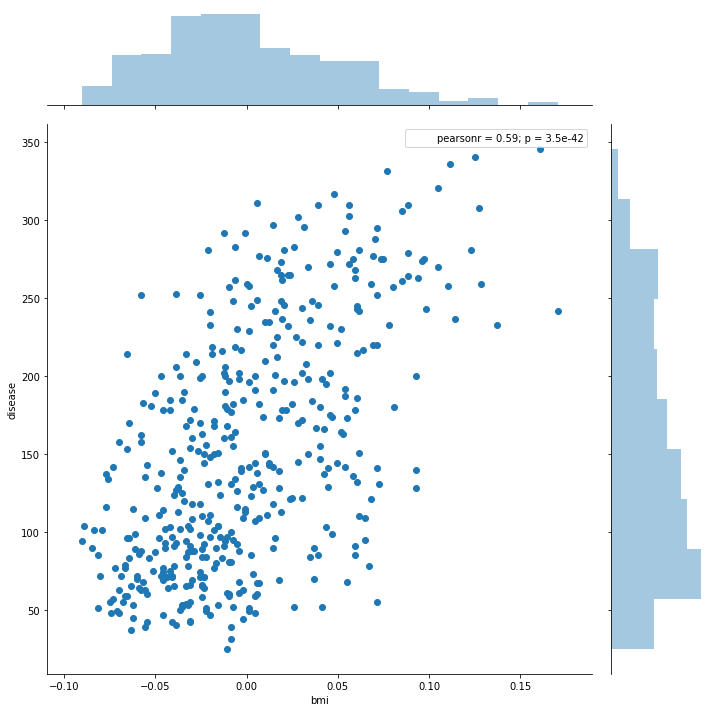

In [95]:
import seaborn as sns
sns.jointplot('bmi', 'disease', data = df, size = 10)

### Other Examples of Machine Learning

- What category does this belong to?

- What is this a picture of?

In [12]:
from sklearn import datasets

In [13]:
iris = datasets.load_iris()
digits = datasets.load_digits()

In [14]:
print(digits.data)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


In [15]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [16]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [17]:
iris.data[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [18]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### What kind of Flower is This?

- **K-Means Clustering**

- **Naive Bayes Classifier**

- **Decision Tree**

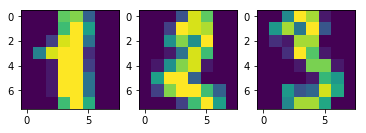

In [19]:
plt.subplot(1, 3, 1)
plt.imshow(digits.images[1])

plt.subplot(1, 3, 2)
plt.imshow(digits.images[2])

plt.subplot(1, 3, 3)
plt.imshow(digits.images[3])


### Learning and Predicting with Digits

Given an image, which digit does it represent?  Here, we will *fit* an estimator to *predict* which class unknown images belong to.  To do this, we will use the support vector classifier.

In [20]:
from sklearn import svm

In [21]:
clf = svm.SVC(gamma = 0.001, C = 100)

In [22]:
#fit on all but last data point
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
clf.predict(digits.data[-1:])

array([8])

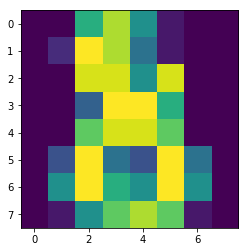

In [24]:
plt.imshow(digits.images[-1])